<h1 style="text-align: center;" markdown="1">Models on the raw data</h1>

First model is build using all the raw features except dates attributes. This model tells us how random
forest model performs on the overall data. We evaluate importance scores for attributes to see 
which variables are importants in term of their predictive power

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Configure path and load the data

In [3]:
#### Configure path
trainPath = "~/train14.csv"

In [4]:
train = pd.read_csv(trainPath)

In [5]:
print("train data size", train.shape)

('train data size', (18200524, 37))


In [6]:
train.columns.values

array(['Unnamed: 0', 'srch_destination_id', 'date_time', 'site_name',
       'posa_continent', 'user_location_country', 'user_location_region',
       'user_location_city', 'orig_destination_distance', 'user_id',
       'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co',
       'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent',
       'hotel_country', 'hotel_market', 'hotel_cluster', 'year', 'month',
       'day', 'hour', 'part_of_day', 'type_of_day', 'season',
       'duration_of_stay', 'is_alone', 'dest_feature_pc1',
       'dest_feature_pc2', 'dest_feature_pc3'], dtype=object)

#### Select raw features !

In [7]:
rawPredictors = ['site_name', 'posa_continent', 'user_location_country', 'user_location_region',
                 'user_location_city', 'orig_destination_distance', 'user_id','is_mobile', 'is_package', 'channel',
                 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt','srch_destination_id', 'srch_destination_type_id', 'is_booking',
                  'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster']

In [8]:
train = train[rawPredictors]
train.head(3)

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,18,2,231,48,2982,NaN,1195632,0,0,5,...,0,6,1,3,0,2,5,76,1537,30
1,18,2,231,48,2982,NaN,1195632,0,1,5,...,0,6,1,3,0,1,5,76,1537,60
2,23,1,1,401,230,NaN,999935,0,0,3,...,0,2,1,3,0,4,5,76,1537,30


#### DownSample Data Due to computational limitation & large size of data

In [9]:
import random
random.seed(24)
unique_users = train.user_id.unique()
print("We have data for", len(unique_users), "users")
usr_cnt = int(len(unique_users) * 0.01) # select random users
print("Randomly selecting data for", usr_cnt, "users")
sel_user_ids = [unique_users[i] for i in sorted(random.sample(range(len(unique_users)), usr_cnt)) ]
rf_dat = train[train.user_id.isin(sel_user_ids)]
print("new sample contains", rf_dat.shape[0], "rows and", rf_dat.shape[1], "columns")

('We have data for', 922876, 'users')
('Randomly selecting data for', 9228, 'users')
('new sample contains', 180119, 'rows and', 21, 'columns')


In [10]:
test = pd.read_csv("~/test14.csv")
#Select data for selected user from test set
test = test[test.user_id.isin(sel_user_ids)]

In [11]:
test = test[rawPredictors]

In [19]:
train = rf_dat

In [20]:
print("Train size:", train.shape)
print("Test size:", test.shape)

('Train size:', (180119, 21))
('Test size:', (4370, 21))


### 3. Missing Values

In [21]:
missing_count = train.count(axis=0)
missing_count

site_name                    180119
posa_continent               180119
user_location_country        180119
user_location_region         180119
user_location_city           180119
orig_destination_distance    118146
user_id                      180119
is_mobile                    180119
is_package                   180119
channel                      180119
srch_adults_cnt              180119
srch_children_cnt            180119
srch_rm_cnt                  180119
srch_destination_id          180119
srch_destination_type_id     180119
is_booking                   180119
cnt                          180119
hotel_continent              180119
hotel_country                180119
hotel_market                 180119
hotel_cluster                180119
dtype: int64

In [22]:
missing_count = test.count(axis=0)
missing_count

site_name                    4370
posa_continent               4370
user_location_country        4370
user_location_region         4370
user_location_city           4370
orig_destination_distance    2956
user_id                      4370
is_mobile                    4370
is_package                   4370
channel                      4370
srch_adults_cnt              4370
srch_children_cnt            4370
srch_rm_cnt                  4370
srch_destination_id          4370
srch_destination_type_id     4370
is_booking                   4370
cnt                          4370
hotel_continent              4370
hotel_country                4370
hotel_market                 4370
hotel_cluster                4370
dtype: int64

##### As of now, we will fill NA with -1:
TODO: better way to impute missing values

In [23]:
## replace NA's in orig_destination_distance by -1
train.fillna(-1, inplace=True)

In [24]:
## replace NA's in orig_destination_distance by -1
test.fillna(-1, inplace=True)

In [25]:
# Exclude Target and Predictors
predictors = [c for c in rawPredictors if c not in ['hotel_cluster']]

# Models

# Random Forest On Raw Data

In [26]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

model1_RF = RandomForestClassifier(n_estimators=5, min_weight_fraction_leaf=0.1)
scores = cross_validation.cross_val_score(model1_RF, train[predictors], train['hotel_cluster'], cv=5)
scores

array([ 0.05195741,  0.05649592,  0.05691441,  0.05207899,  0.05404129])

## Naive Bayes Model on Raw Data

In [27]:
from sklearn.naive_bayes import GaussianNB
model4_NB = GaussianNB()
scorescvNB = cross_validation.cross_val_score(model4_NB, train[predictors], train['hotel_cluster'], cv=5)
scorescvNB

array([ 0.04211489,  0.04478606,  0.04944613,  0.04838486,  0.03500875])

# Support Vector Model on Raw Data

In [28]:
from sklearn.svm import SVC
model3_SVC = SVC(C=1.0, kernel='rbf', 
                 degree=3, gamma='auto', coef0=0.0, shrinking=True, 
                 probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                 max_iter=-1, decision_function_shape=None, 
                 random_state=24)
scorescvSVC = cross_validation.cross_val_score(model3_SVC, train[predictors], train['hotel_cluster'], cv=5)
scorescvSVC

array([ 0.04788178,  0.05361008,  0.04794692,  0.03838569,  0.03448084])

# Multinomial Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
model5_MLR = LogisticRegression()
scorescvMLR = cross_validation.cross_val_score(model5_MLR, train[predictors], train['hotel_cluster'], cv=5)
scorescvMLR 

array([ 0.01755018,  0.03526833,  0.03920153,  0.03785796,  0.02381151])

# Gradient Boosting Model on Raw Data

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
model6_GB = GradientBoostingClassifier()
scorescvGB = cross_validation.cross_val_score(model6_GB, train[predictors], train['hotel_cluster'], cv=5)
scorescvGB

array([ 0.03815016,  0.05366558,  0.0478081 ,  0.04727384,  0.03078547])

# AdaBoost Classifier on Raw Data

In [31]:
from sklearn.ensemble import AdaBoostClassifier
model7_AB = AdaBoostClassifier()
scorescvAB = cross_validation.cross_val_score(model7_AB, train[predictors], train['hotel_cluster'], cv=5)
scorescvAB

array([ 0.02498059,  0.04575726,  0.0308726 ,  0.04082993,  0.01425356])

### Plot Testing scores

In [ ]:
## Plot Testing scores
import matplotlib.pyplot as plt
test_scoreRF  = model1_RF.score(test[predictors], test['hotel_cluster'])
test_scoreKNN = model2_KNN.score(test[predictors], test['hotel_cluster'])
test_scoreSVC = model3_SVC.score(test[predictors], test['hotel_cluster'])
test_scoreNB = model4_NB.score(test[predictors], test['hotel_cluster'])
test_scoreGB = model6_GB.score(test[predictors], test['hotel_cluster'])
test_scoreAB = model7_AB.score(test[predictors], test['hotel_cluster'])
keys = ['RF','KNN', 'SVC' 'NB', 'GB', 'AB']
testscores = [test_scoreRF, test_scoreKNN, test_scoreSVC, test_scoreNB, test_scoreGB, test_scoreAB]
accuracyInPercent = [x * 100 for x in testscores]
testAccuracy = dict(zip(keys, accuracyInPercent))
print(testAccuracy)
plt.bar(range(len(testAccuracy)), testAccuracy.values(), align="center")
plt.xticks(range(len(testAccuracy)), list(testAccuracy.keys()))

In [2]:
import numpy as np
scorescvRF = np.array([ 0.05195741,  0.05649592,  0.05691441,  0.05207899,  0.05404129])
scorescvNB = np.array([ 0.04211489,  0.04478606,  0.04944613,  0.04838486,  0.03500875])
scorescvSVC = np.array([ 0.04788178,  0.05361008,  0.04794692,  0.03838569,  0.03448084])
scorescvMLR = np.array([ 0.01755018,  0.03526833,  0.03920153,  0.03785796,  0.02381151])
scorescvGB = np.array([ 0.03815016,  0.05366558,  0.0478081 ,  0.04727384,  0.03078547])
scorescvAB = np.array([ 0.02498059,  0.04575726,  0.0308726 ,  0.04082993,  0.01425356])

We observe random forest slightly performs well as compared to other algorithm


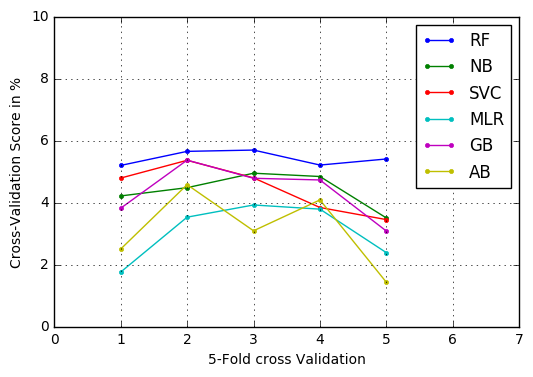

In [2]:
'Cross Validation Score Plot for the Models'
print("We observe random forest slightly performs well as compared to other algorithm")
#Plot Cross Validation Score
import matplotlib.pyplot as plt
plt.xlim(*(0,7))
ylim=(0, 10)
plt.ylim(*ylim)
crossValScores = [scorescvRF, scorescvNB, scorescvSVC, scorescvMLR, scorescvGB, scorescvAB]
labels = ['RF', 'NB', 'SVC', 'MLR', 'GB', 'AB']
crossValInPercent = [x * 100 for x in crossValScores]
for value, label in zip(crossValInPercent, labels):
    plt.plot([1, 2, 3, 4, 5],value, '.-', label=label)
plt.grid()
plt.ylabel('Cross-Validation Score in %')
plt.xlabel('5-Fold cross Validation')
plt.legend()
plt.show()